<a href="https://colab.research.google.com/github/hmarathe420/Credit_Card_Default_Prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Harshal Marathe  


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

GitHub Link --> [Tap here](https://github.com/hmarathe420/Credit_Card_Default_Prediction)

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [331]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV



### Dataset Loading

In [247]:
# Mounting the google drive for accessing the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [248]:
# Loading the Dataset
df = pd.read_csv("/content/drive/MyDrive/Credit Card Default Prediction/default of credit card clients.xls - Data.csv", header= 1)

In [249]:
# Removing the index if there is
df.reset_index(drop = True , inplace = True)

### Dataset First View

In [250]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [251]:
# Dataset Rows & Columns count
print(f'The dataset has {df.shape[1]} columns & {df.shape[0]} Rows.')

The dataset has 25 columns & 30000 Rows.


### Dataset Information

In [252]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [253]:
# Dataset Duplicate Value Counts

duplicate_rows = df.duplicated().sum()
print(f'Duplicate_rows : {duplicate_rows}')

duplicate_specific = df.duplicated(subset = ['ID','LIMIT_BAL' ,'SEX','EDUCATION','MARRIAGE']).sum()
print(f"duplicate_over_specific_columns : {duplicate_specific}")

Duplicate_rows : 0
duplicate_over_specific_columns : 0


Above i have tried to calculate the duplicate rows of the whole dataset and over the specific columns but from the above i can conclude that there is no duplicate rows present in this dataset.

#### Missing Values/Null Values

In [254]:
# Missing Values/Null Values Count
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

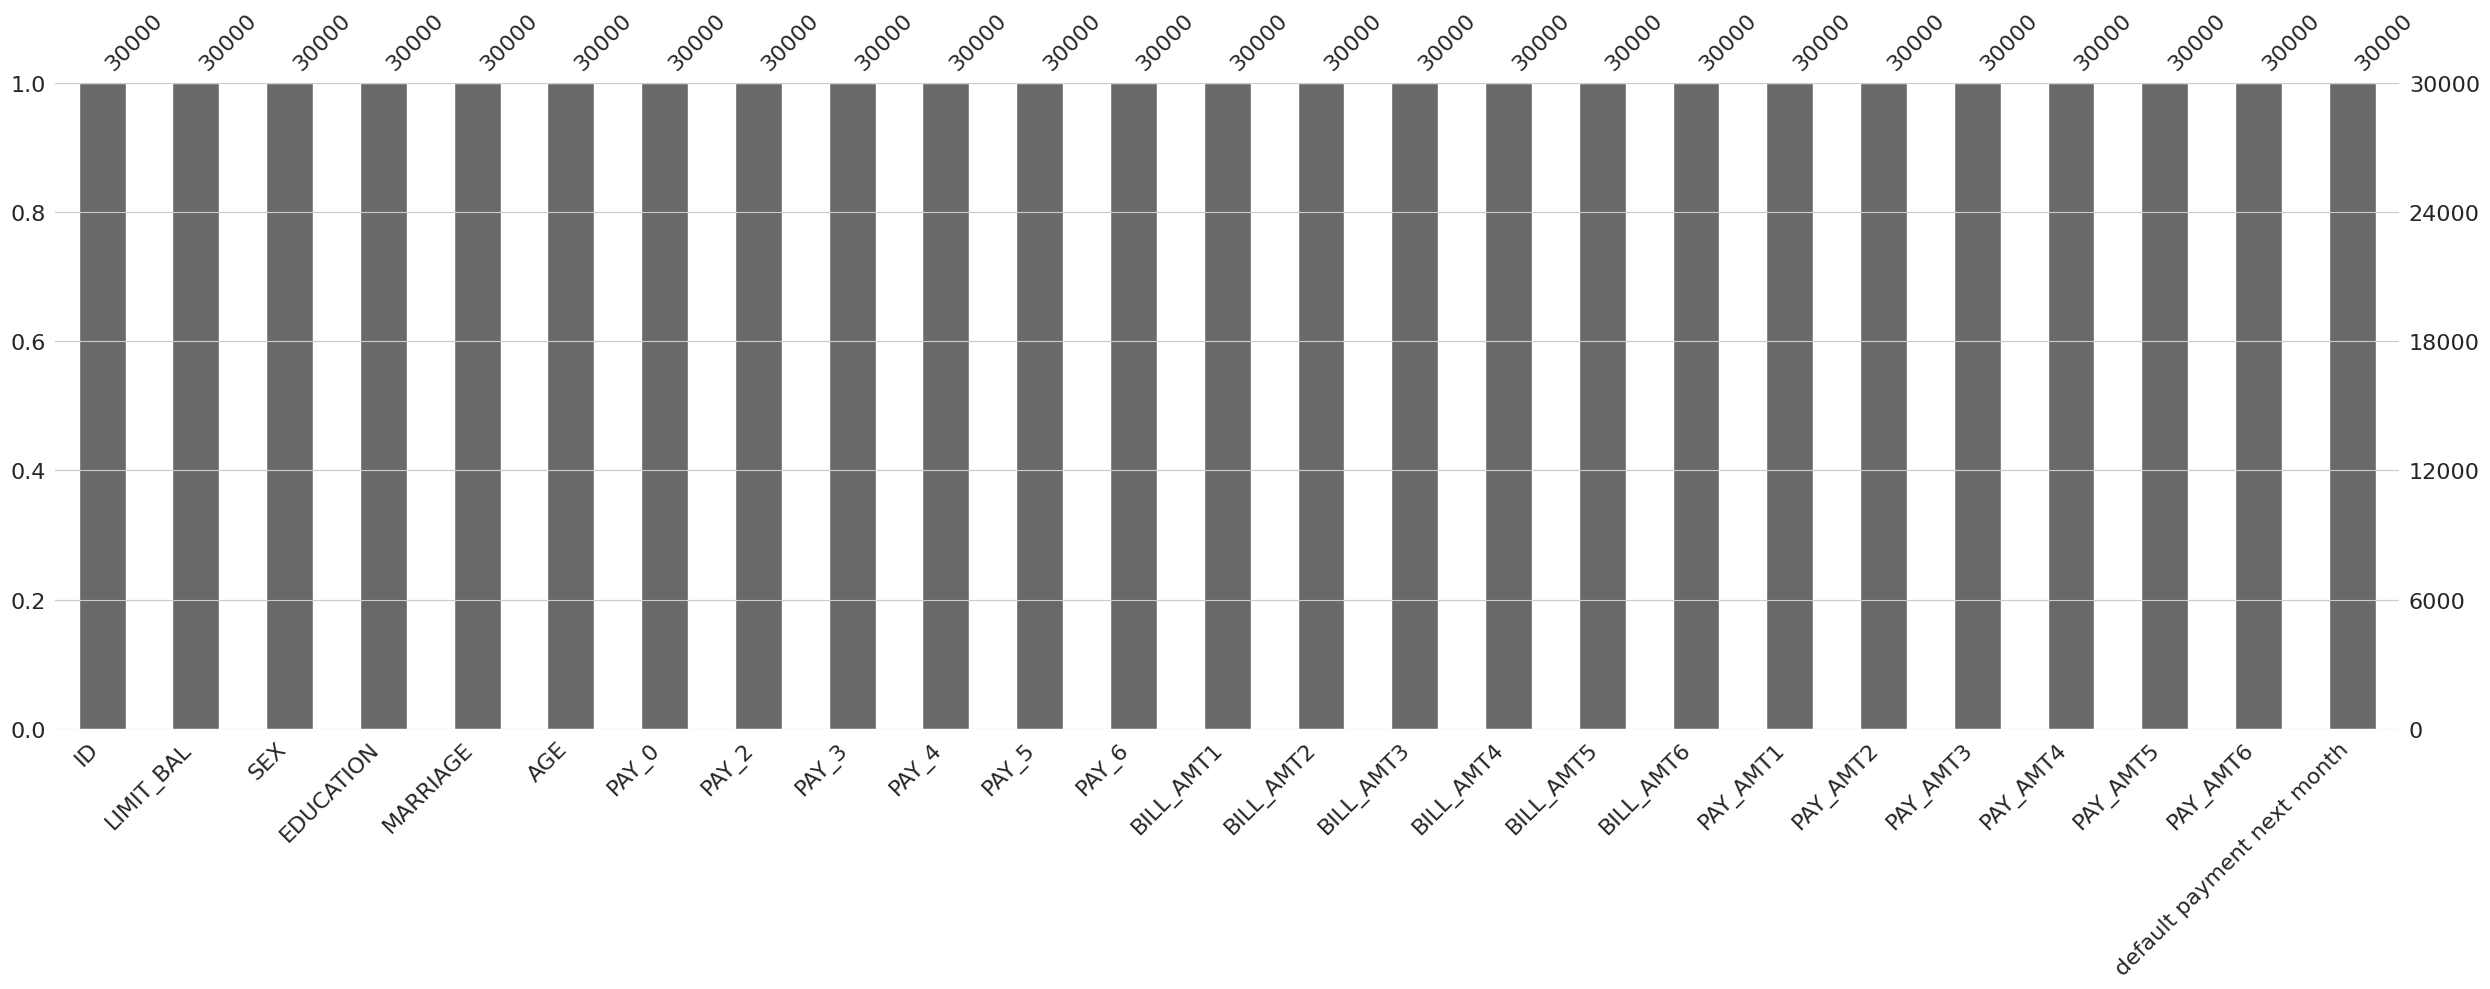

In [255]:
# Visualizing the missing values
msno.bar(df)

### What did you know about your dataset?

I knew that there are 25 columns and 3000 Records are present in this dataset. and the dataset does not contain duplicate rows. and there is no any missing value in dataset. This kind of information i got to know from the above dataset.

## ***2. Understanding Your Variables***

In [256]:
# Dataset Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [257]:
# Dataset Describe
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Variables Description

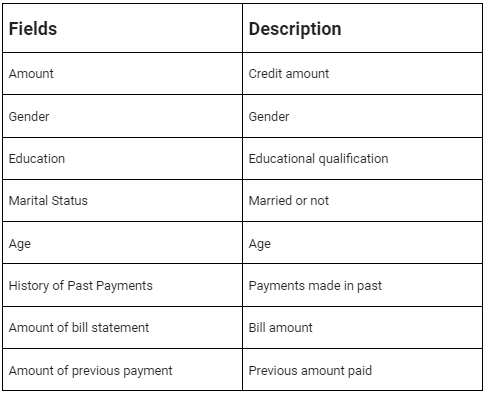




ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years



PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months,8=payment delay for eight - months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

### Check Unique Values for each variable.

In [258]:
# Check Unique Values for each variable.
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [259]:
# Deleting the ID column from the dataset
del df['ID']

In [260]:
# Renaming payment column with month tag
df.rename(columns = {'PAY_0':'pay_sept','PAY_2':'pay_agu','PAY_3':'pay_july','PAY_4':'pay_jun','PAY_5':'pay_may','PAY_6': 'pay_apr'}, inplace =True)

In [261]:
# Renaming Bill amount column with month tag
df.rename(columns={'BILL_AMT1':'SEPT_BILL_AMT','BILL_AMT2':'AUG_BILL_AMT','BILL_AMT3':'JULY_BILL_AMT','BILL_AMT4':'JUN_BILL_AMT','BILL_AMT5':'MAY_BILL_AMT','BILL_AMT6':'APR_BILL_AMT'} , inplace = True)

In [262]:
# Renaming previous payment column with month tag
df.rename(columns = {'PAY_AMT1':'SEPT_PAY_AMT','PAY_AMT2':'AGU_PAY_AMT','PAY_AMT3':'JUL_PAY_AMT','PAY_AMT4':'JUN_PAY_AMT','PAY_AMT5':'APR_PAY_AMT','PAY_AMT6':'MAY_PAY_AMT'}, inplace = True)

In [263]:
# renaming the default payment column with _
df.rename(columns ={'default payment next month':'default_payment_next_month'}, inplace = True)

In [264]:
# checking whether the column name has been changed or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   pay_sept                    30000 non-null  int64
 6   pay_agu                     30000 non-null  int64
 7   pay_july                    30000 non-null  int64
 8   pay_jun                     30000 non-null  int64
 9   pay_may                     30000 non-null  int64
 10  pay_apr                     30000 non-null  int64
 11  SEPT_BILL_AMT               30000 non-null  int64
 12  AUG_BILL_AMT                30000 non-null  int64
 13  JULY_BILL_AMT               30000 non-null  int64
 14  JUN_BI

### What all manipulations have you done and insights you found?

Above i have deleted the index column. and rename the repayment_status column, bill amount column, previous month bill amount column and default payment column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### Exploratory Data Analysis

#### Chart - 1

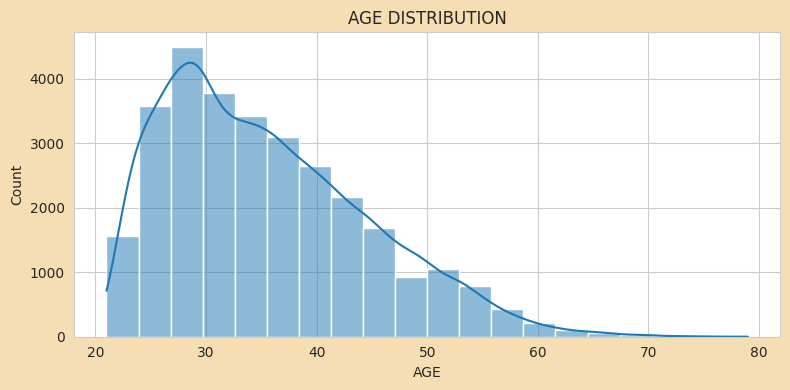

In [265]:
# Age Distribution
plt.figure(figsize= (8,4), facecolor = 'wheat')
sns.histplot(df['AGE'],bins = 20, kde = True)
plt.title('AGE DISTRIBUTION')
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to see whether the data is normalize or not and also wanted to see the age distribution. That's why i pick the above histplot.

##### 2. What is/are the insight(s) found from the chart?

From the above histplot i found that the data is not normalize. and the people having 30 age has high count in dataset.

#### Chart - 2

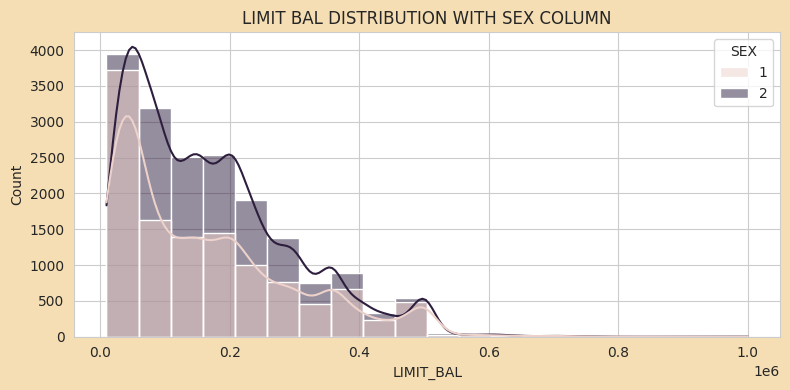

In [266]:
# LIMIT BAL DISTRIBUTION WITH SEX COLUMN
plt.figure(figsize = (8,4), facecolor = 'wheat')
plt.title('LIMIT BAL DISTRIBUTION WITH SEX COLUMN')
sns.histplot(data = df, x= 'LIMIT_BAL',bins = 20, hue = 'SEX', kde = True)
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to see the LIMIT BAL with sex column thats why i use the above chart with kde.

##### 2. What is/are the insight(s) found from the chart?

From the above graph i found that the female has high count as compare to male.
and the female has high LIMIT BAL as compare to male.
and from the above graph i can conclude that as LIMIT BALANCE increase the count of peoples are decreasing it means the less peoples get High LIMIT BALANCE.

#### Chart - 3

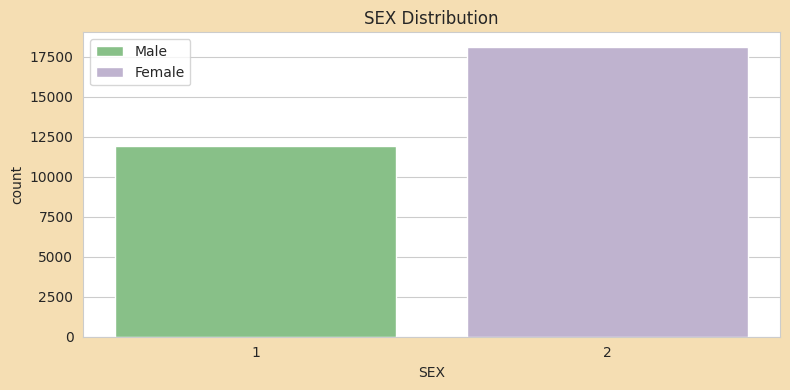

In [267]:
# SEX COLUMN distribution
plt.figure(figsize = (8,4), facecolor = 'wheat')
plt.title('SEX Distribution')
sns.countplot(data = df, x = 'SEX', palette='Accent',label = ['Male','Female'])
plt.legend()
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to check how many males and females present in the dataset that's why i pick the countplot for visualizing the sex column.

##### 2. What is/are the insight(s) found from the chart?

From the count plot i found the insights. The insights are the male count is less than females and female count is higher than males.

#### Chart - 4

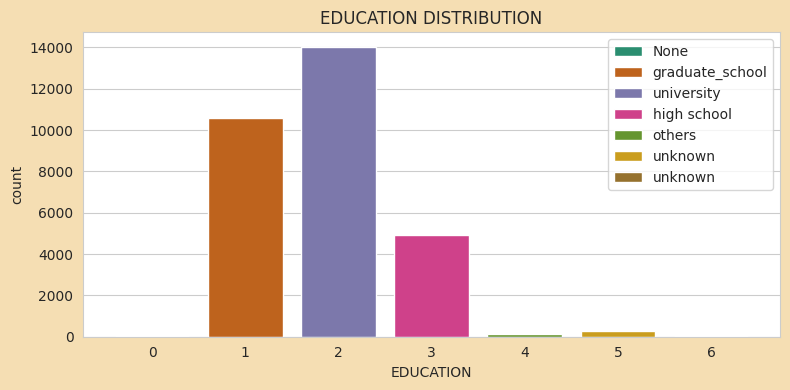

In [268]:
# Education Distribution
plt.figure(figsize =(8,4), facecolor = 'wheat')
plt.title('EDUCATION DISTRIBUTION')
sns.countplot(data = df, x = 'EDUCATION', palette='Dark2', label =['None','graduate_school','university','high school','others','unknown','unknown'])
plt.legend()
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to distribute the education column that's why i pick above chart.

##### 2. What is/are the insight(s) found from the chart?

From the above count plot i got the folowing insights.



*   The Education 'University' has high count as compare to other education type.
*   graduate school has count higher than the high school


*   The high school has high count than other and none education except graduate and university.
*   The none, other and unknown has very low count.






#### Chart - 5

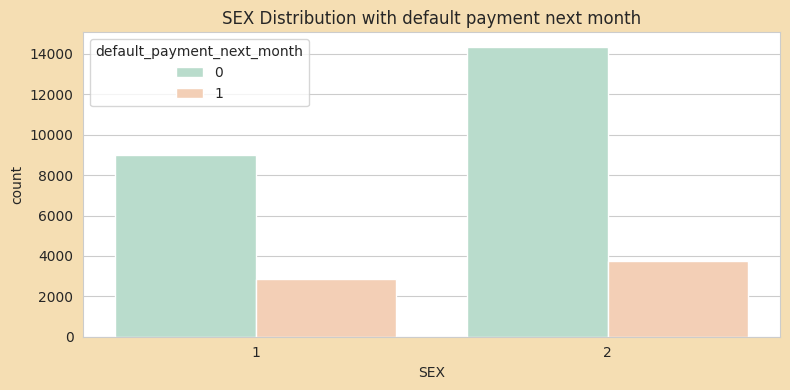

In [269]:
# sex distribution with default payment next month

plt.figure(figsize = (8,4), facecolor = 'wheat')
plt.title('SEX Distribution with default payment next month')
sns.countplot(data = df , x = 'SEX', hue = 'default_payment_next_month', palette='Pastel2')
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to distribute the sex column with default payment next month column that's why i pick above column.

##### 2. What is/are the insight(s) found from the chart?

The female has high count with default than males this kind of insight i got from the above countplot.

#### Chart - 6

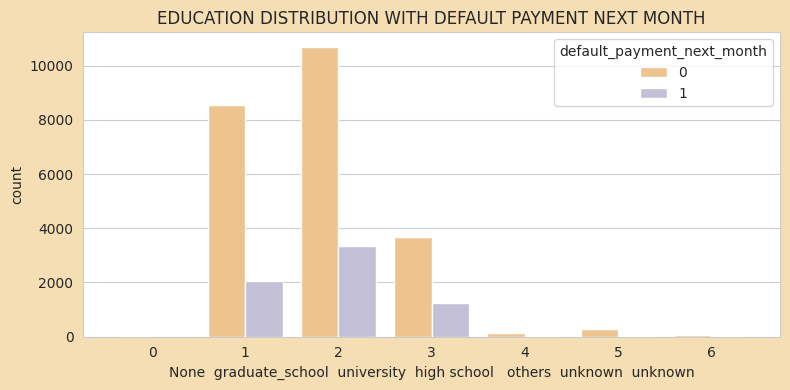

In [270]:
# Education Distribution with default payment next month
plt.figure(figsize = (8,4), facecolor = 'wheat')
plt.title('EDUCATION DISTRIBUTION WITH DEFAULT PAYMENT NEXT MONTH')
sns.countplot(data = df, x= 'EDUCATION', hue = 'default_payment_next_month', palette= 'PuOr')
plt.xlabel("None  graduate_school  university  high school   others  unknown  unknown")
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to distribute the education column with default payment next month column that's why pick above chart.

##### 2. What is/are the insight(s) found from the chart?

From the above count plot i found the following insights.





*   The university education type has high count and high defaults as compare to othe education type.
*   From the above graph we can conclude that the graduate_school, university and high school education type has high count and high defaults as compare to other education type.

*   The education type None, other and unknows has low count and low defaults.





#### Chart - 7

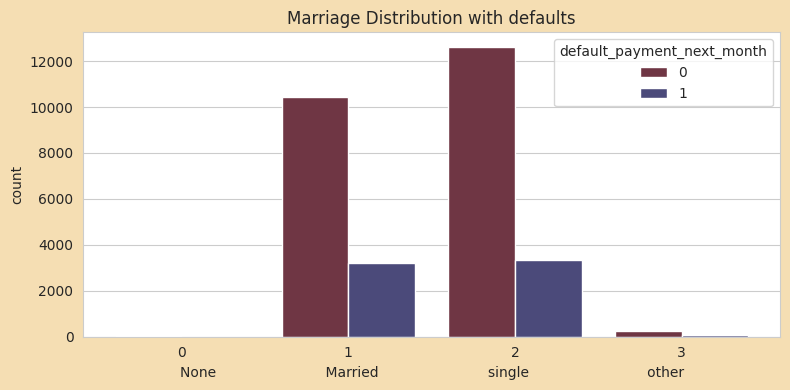

In [271]:
# Marriage distribution with defaults
plt.figure(figsize = (8,4), facecolor = 'wheat')
plt.title('Marriage Distribution with defaults')
sns.countplot(data = df, x = 'MARRIAGE', hue = 'default_payment_next_month', palette = 'icefire_r')
plt.xlabel('None                         Married                         single                           other')
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to distribute the marriage column with defalut column that's why i pick the above plot.

##### 2. What is/are the insight(s) found from the chart?

From the above plot i found the following insights:



*   The single has high count and high defaults as compare to others
*   The marriage also has high count than others except single.

*   from the above plot we can conclude that the marriage and single has almost same number of defaults.
*   The none and other has verry less count and defaults.








#### Chart - 8

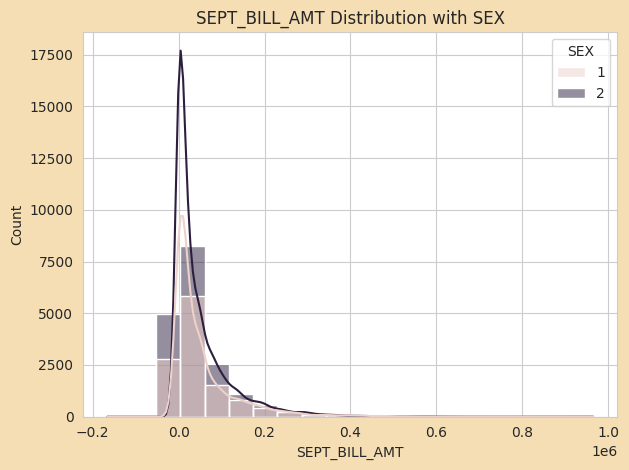

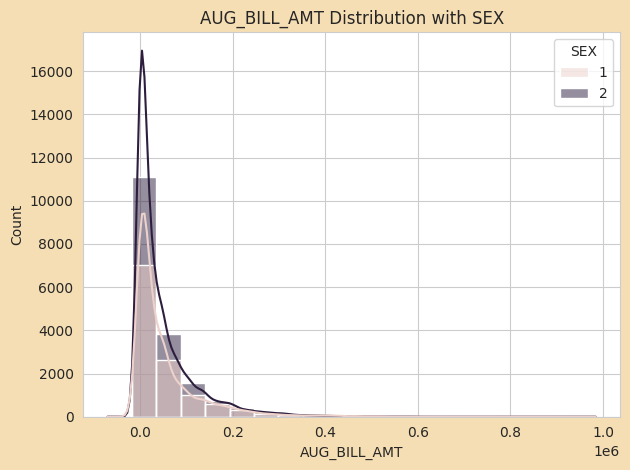

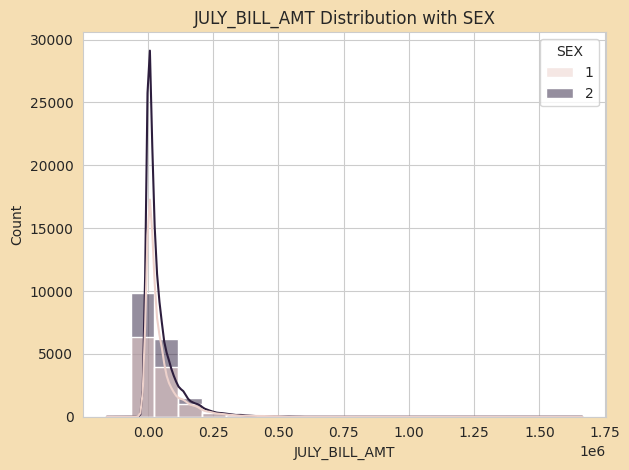

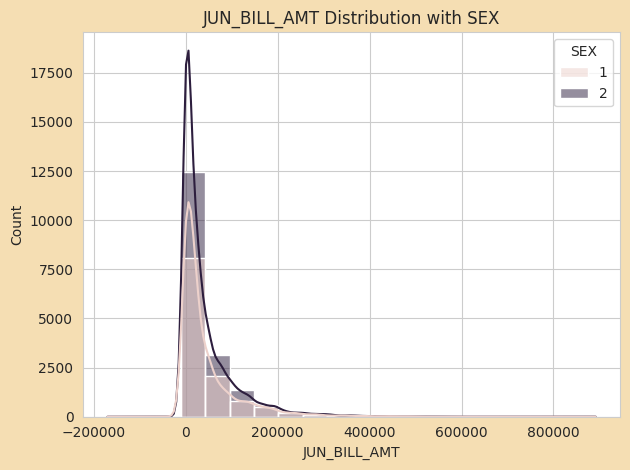

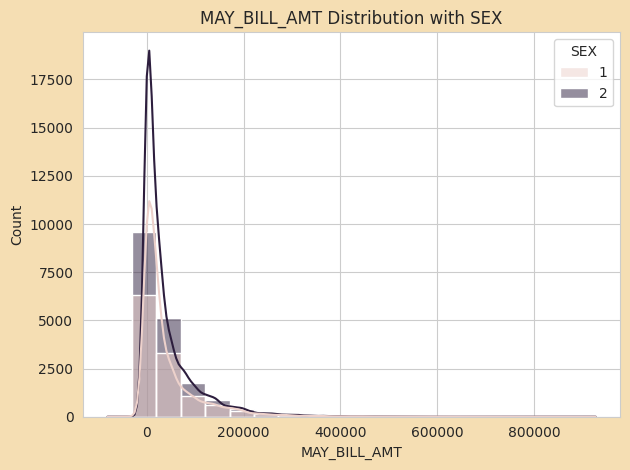

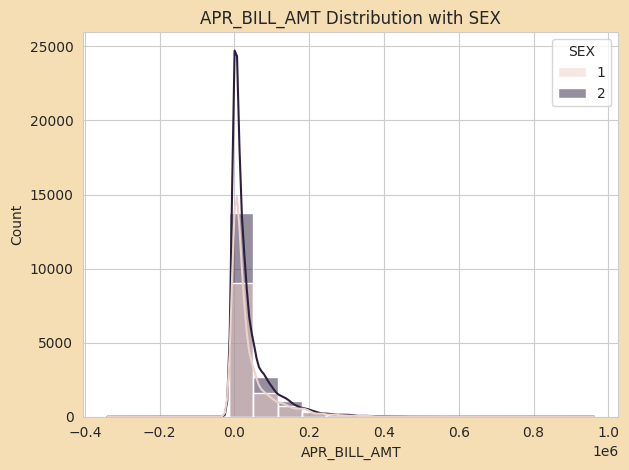

In [272]:
# ploting histplot for each month bill amount distribution with sex column.
pay_bill_list = ['SEPT_BILL_AMT','AUG_BILL_AMT','JULY_BILL_AMT','JUN_BILL_AMT',	'MAY_BILL_AMT',	'APR_BILL_AMT']

for name in pay_bill_list:
  plt.rcParams['figure.autolayout'] = True
  plt.figure(facecolor = 'wheat')
  sns.histplot(data = df, x = name, bins = 20, kde = True, hue = 'SEX')
  plt.title(f'{name} Distribution with SEX')
  plt.plot()
  plt.show()

##### 1. Why did you pick the specific chart?

I wanted to plot the each month bill distribution with sex column that's why pick the histplot.

##### 2. What is/are the insight(s) found from the chart?

From the above histplot i can say that in the every month the count of female is higher than males. and i can also conclude that from the above graph. As bill amount increase the count of male and female decrease. It means we can say that less number of peopes has high bill amount. This kind of insights i got from the above graph.



#### Chart - 9

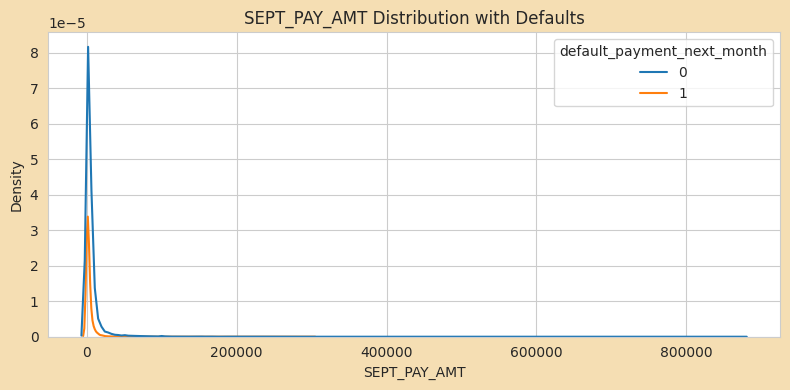

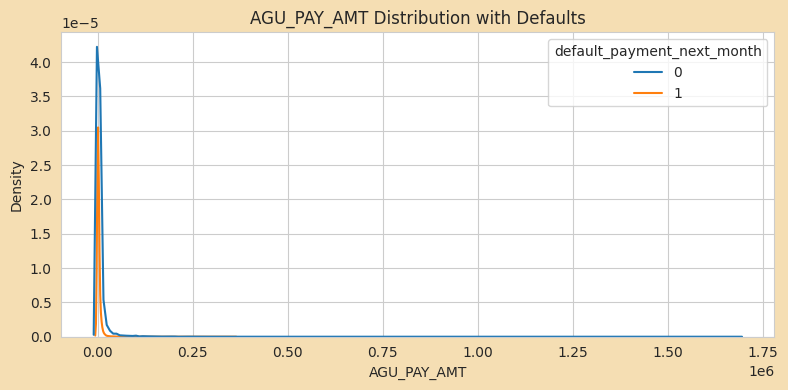

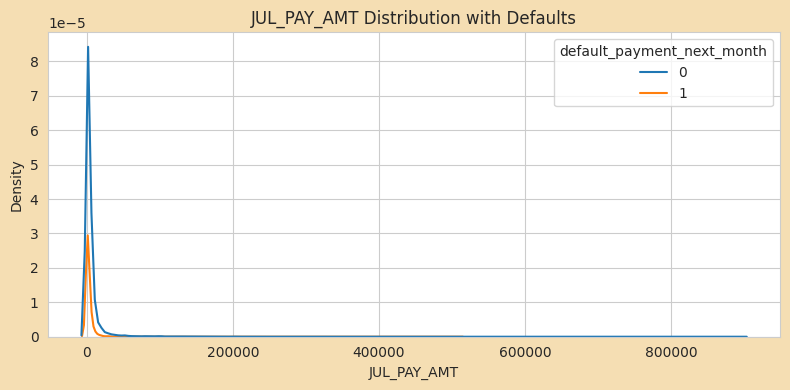

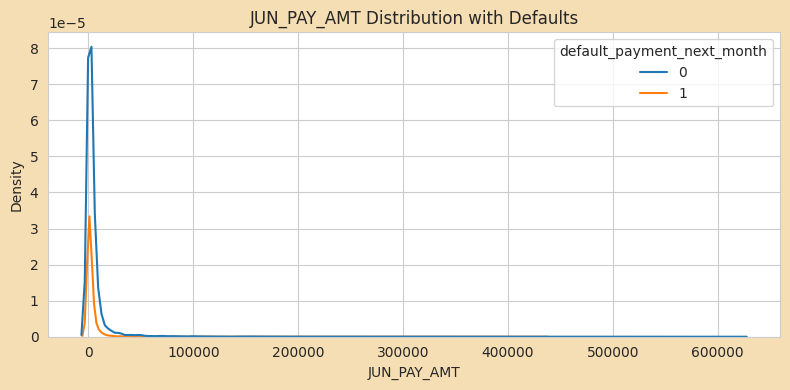

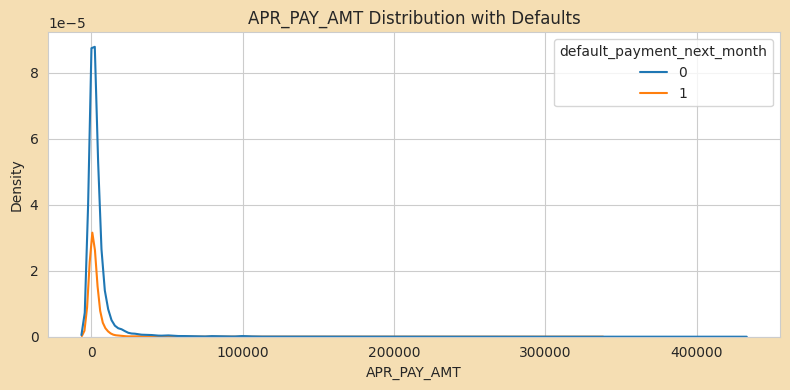

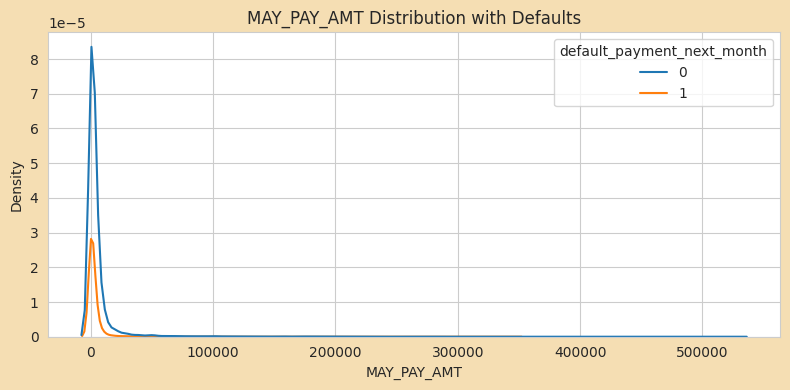

In [273]:
# distribution of each month previous payment with defaults column.
pay_amt_list = ['SEPT_PAY_AMT', 'AGU_PAY_AMT'	, 'JUL_PAY_AMT',	'JUN_PAY_AMT',	'APR_PAY_AMT',	'MAY_PAY_AMT']

for name in pay_amt_list:
  plt.rcParams['figure.autolayout'] == True
  plt.figure(figsize= (8,4),facecolor ='wheat')
  sns.kdeplot(data = df , x = name, hue = 'default_payment_next_month')
  plt.title(f'{name} Distribution with Defaults')
  plt.plot()
  plt.show()


##### 1. Why did you pick the specific chart?

I wanted to do the distribution of previos month payment with defaults column that's why i picked the above chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart i can conclude that in every month there is defaulters present. and we can also say that the defaults density is lower that non defaulter in every month.

#### Chart - 10

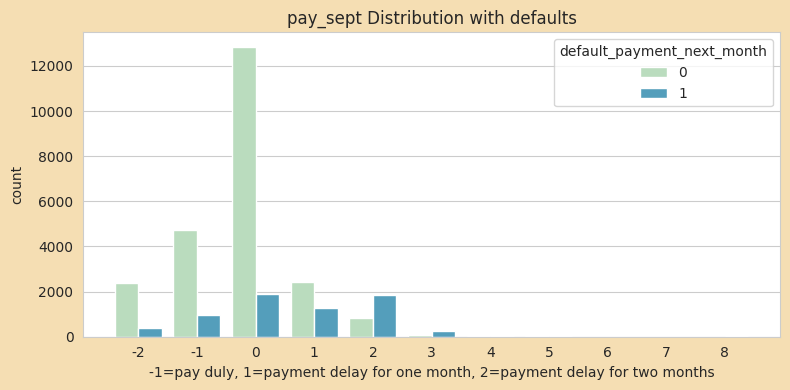

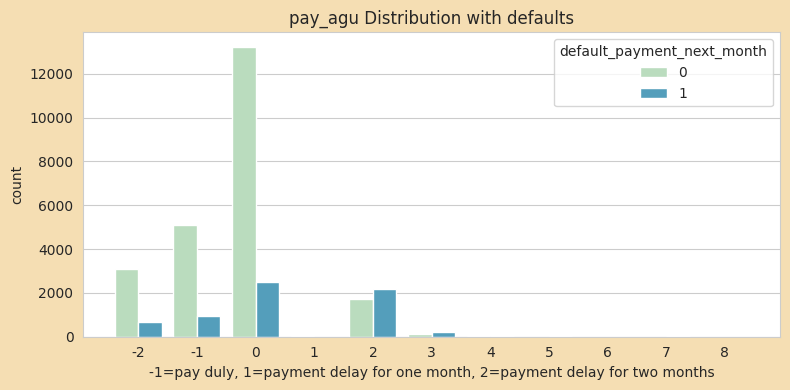

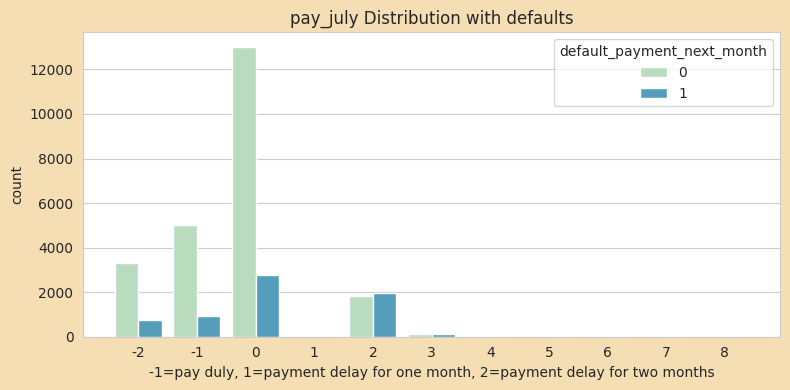

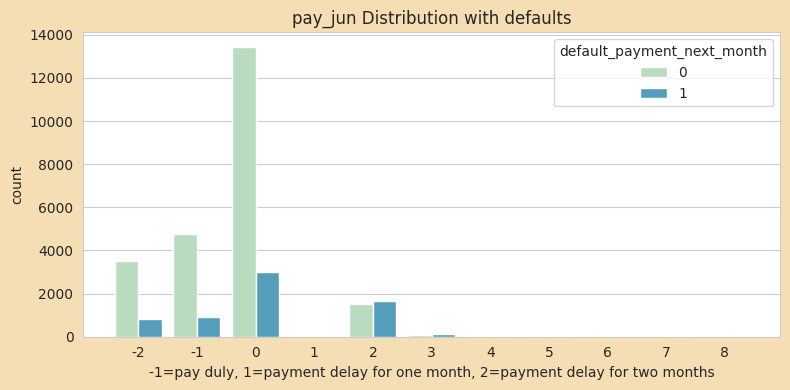

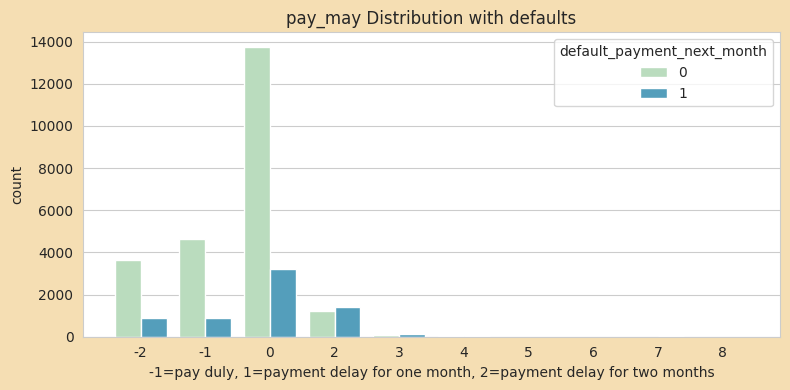

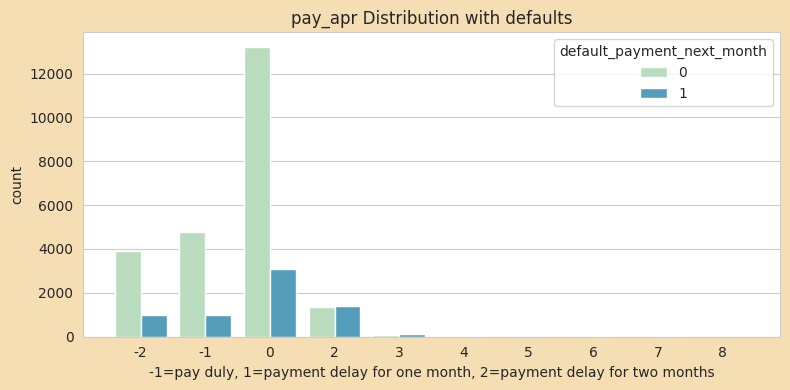

In [274]:
# Distribution of repayment status with defaults
repayment_status_list = ['pay_sept','pay_agu', 'pay_july', 'pay_jun', 'pay_may', 'pay_apr']


for name in repayment_status_list:
  plt.rcParams['figure.autolayout'] == True
  plt.figure(figsize =(8,4), facecolor = 'wheat')
  sns.countplot(data =df, x = name, hue = 'default_payment_next_month', palette = 'GnBu')
  plt.title(f"{name} Distribution with defaults")
  plt.xlabel('-1=pay duly, 1=payment delay for one month, 2=payment delay for two months')
  plt.plot()
  plt.show()

##### 1. Why did you pick the specific chart?

I wanted to distribute the repayment status column with defaults that's why i pick the above chart.

##### 2. What is/are the insight(s) found from the chart?

From the above plot we can conclude that the repayment status 0 (non delay) has high count and high defaults as compare to others. and pay duly and payment delay for 2 month also has high defaults as compare to others.

#### Chart - 11

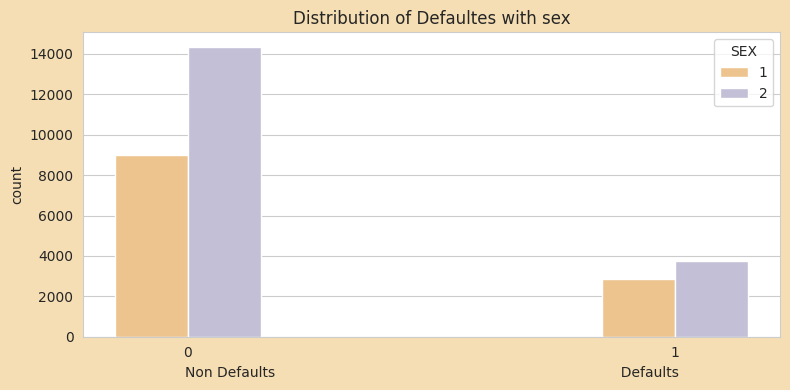

In [275]:
# Distribute the default column with sex column
plt.rcParams['figure.autolayout'] == True
plt.figure(figsize =(8,4), facecolor = 'wheat')
sns.countplot(data = df, x = 'default_payment_next_month', hue = 'SEX', palette = 'PuOr', width = 0.3)
plt.title('Distribution of Defaultes with sex')
plt.xlabel('Non Defaults                                                                               Defaults')
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to distribute the default column with sex that's why i pick the above chart.


##### 2. What is/are the insight(s) found from the chart?

from the above chart i can conclude that in the non default there is high count of female and less count of man and similarly in default. but the non default count is higher than default.

#### Chart - 12

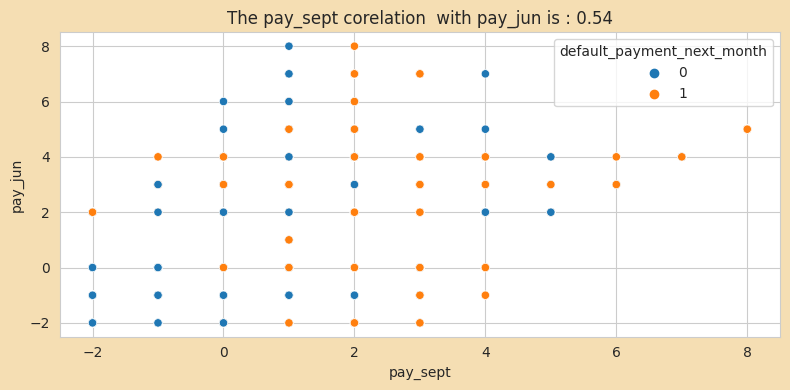

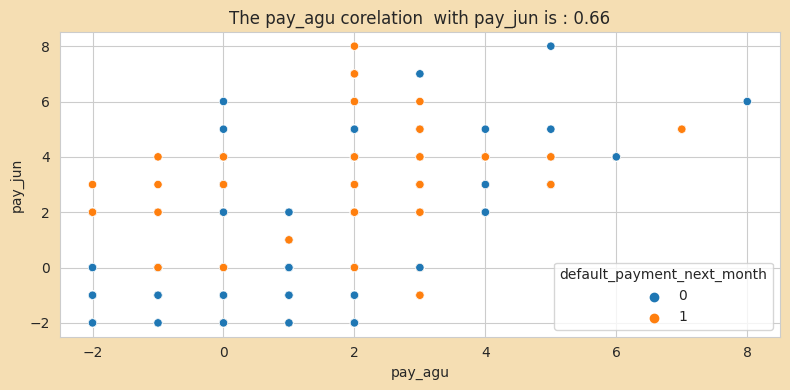

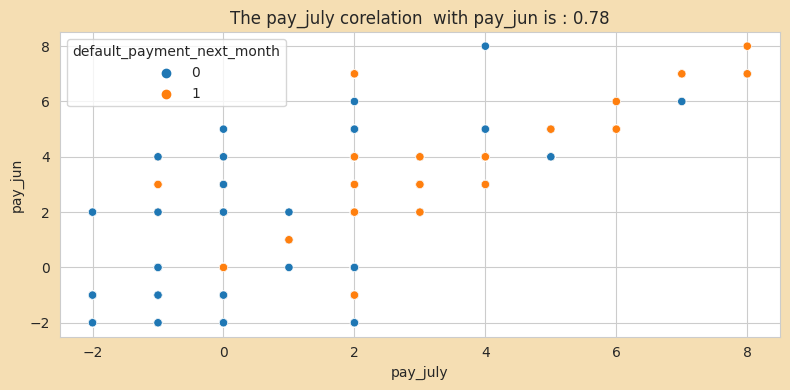

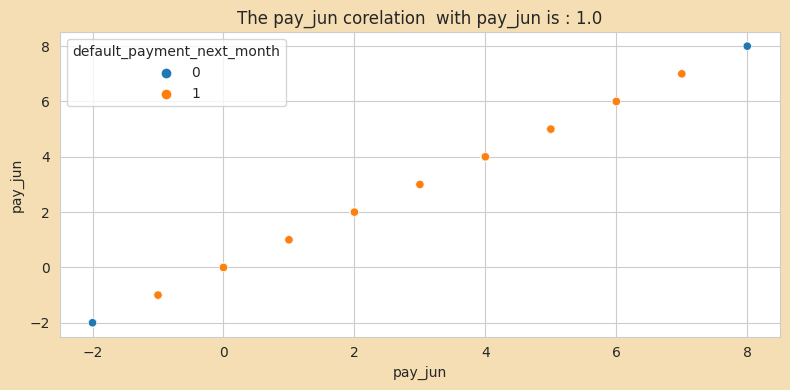

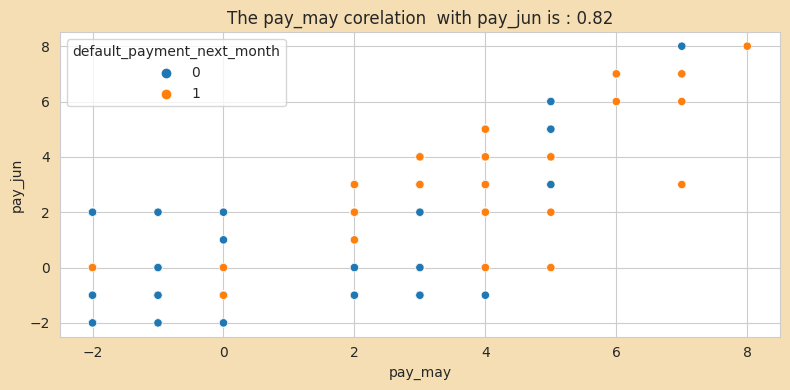

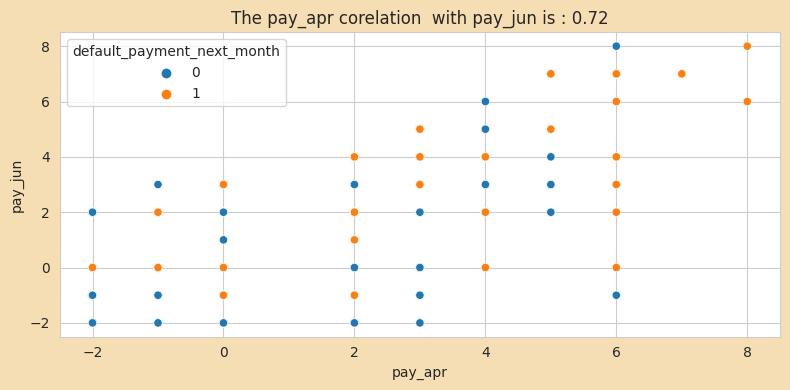

In [276]:
# plotting the scatter plot for visualizing the co-relation of payment status with each other with defaults.
scatter_list = ['pay_sept','pay_agu', 'pay_july', 'pay_jun', 'pay_may', 'pay_apr']

for name in scatter_list:
  corelation_ = round(np.corrcoef(df[name], df['pay_jun'])[0][1],2)
  plt.rcParams['figure.autolayout'] == True
  plt.figure(figsize = (8, 4), facecolor ='wheat')
  sns.scatterplot(data = df ,x = df[name], y = df['pay_jun'], hue ='default_payment_next_month')
  plt.title(f"The {name} corelation  with pay_jun is : {corelation_}")
  plt.plot()
  plt.show()


##### 1. Why did you pick the specific chart?

Above i wanted to plot the co-relation between payment status with each other with defaults that's why i pick the scatter plot.

##### 2. What is/are the insight(s) found from the chart?

From the above i get to know that how the payment status variable is co-related with each other. like the pay_may co-relation with pay_jun is 82% and pay_july corelation with pay_jun is 78% like this insights i got from the above scatter plot.

#### Chart - 13

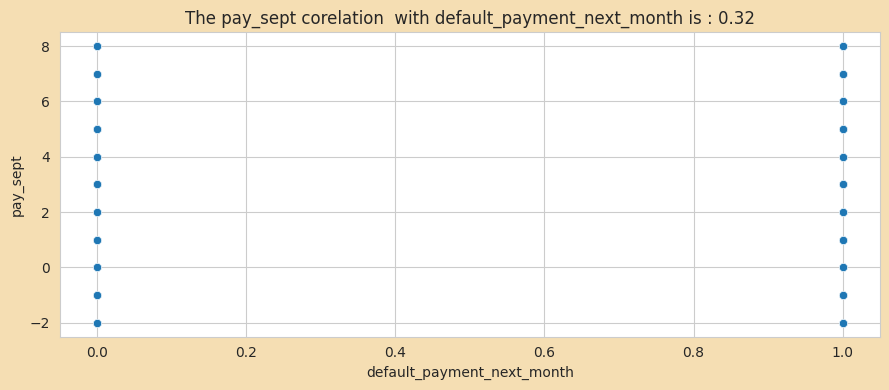

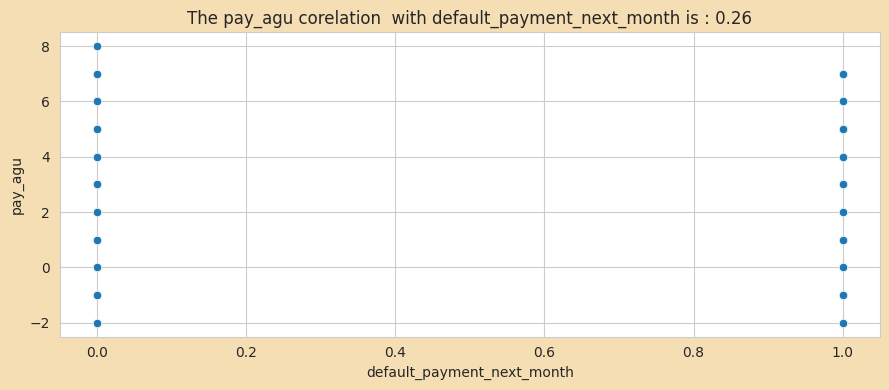

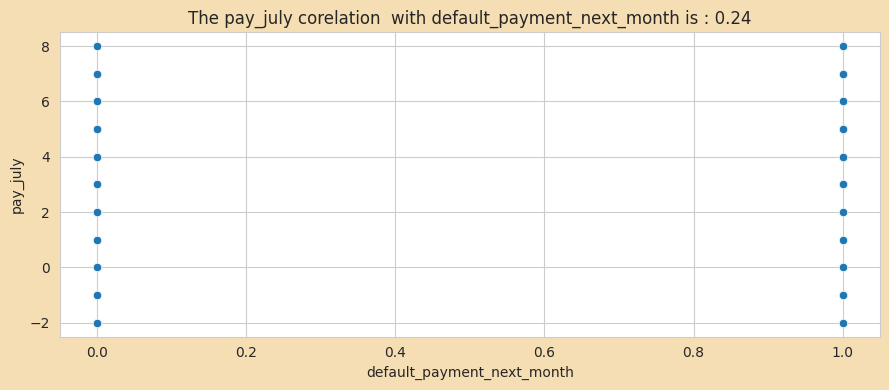

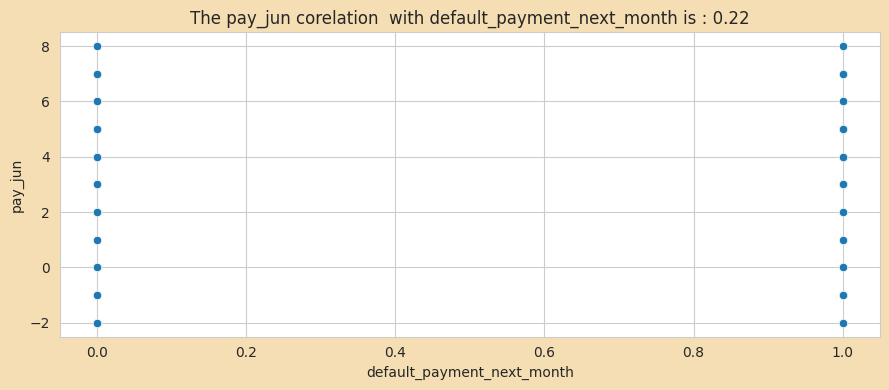

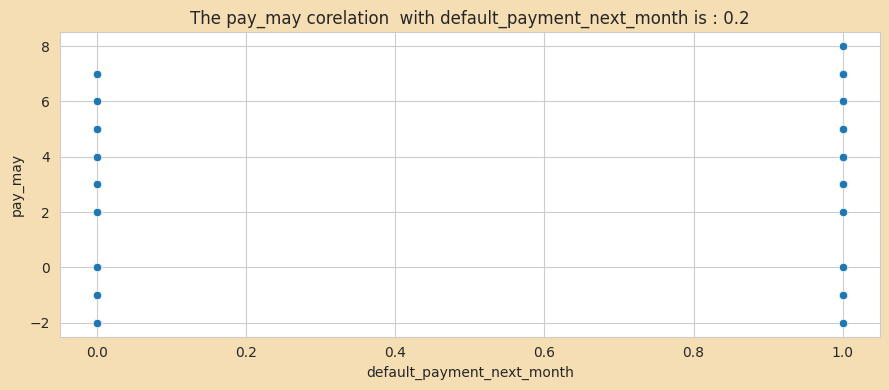

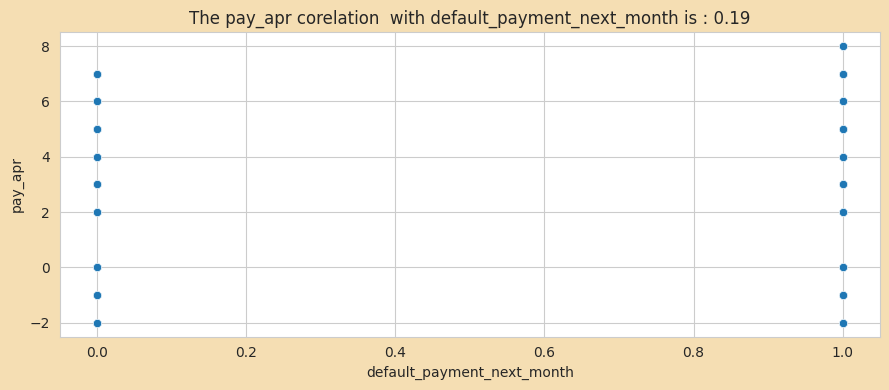

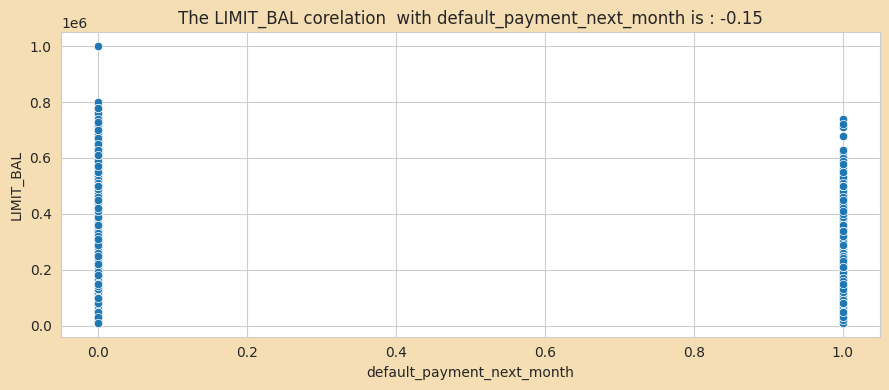

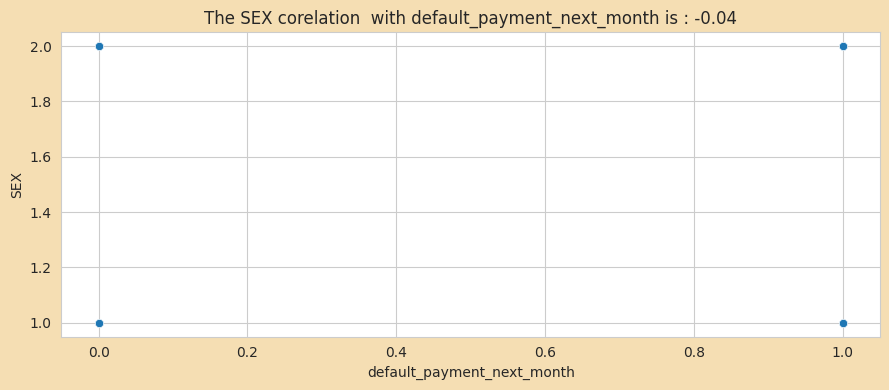

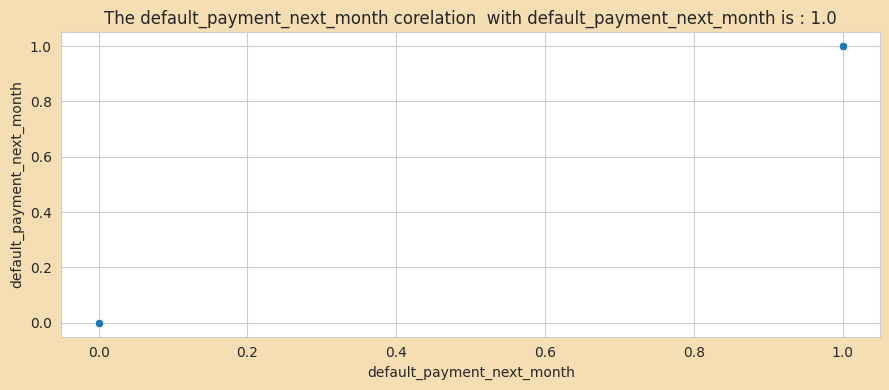

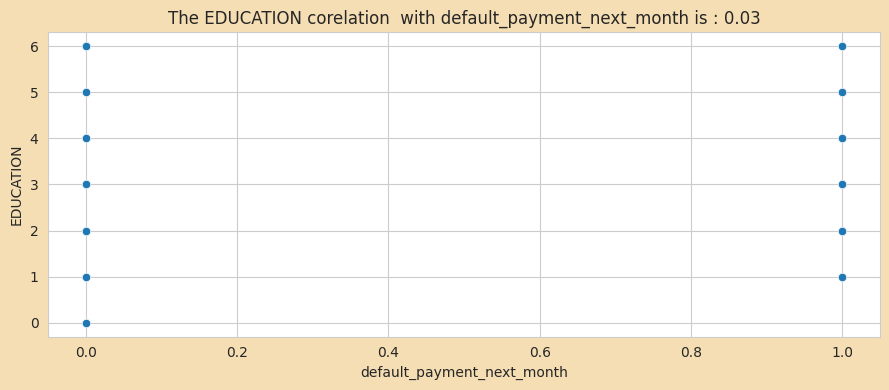

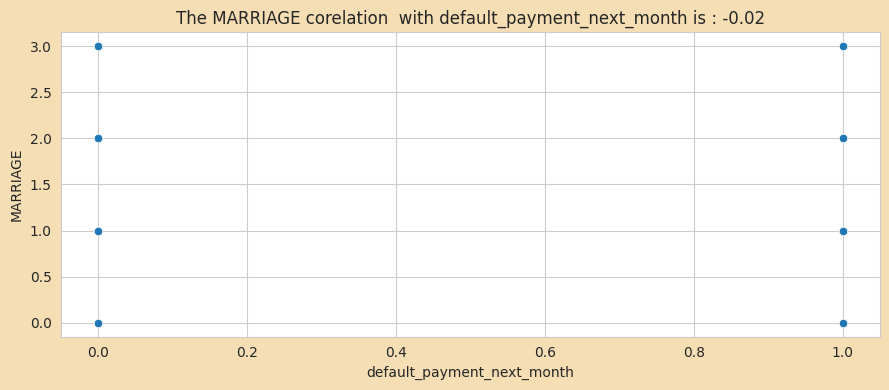

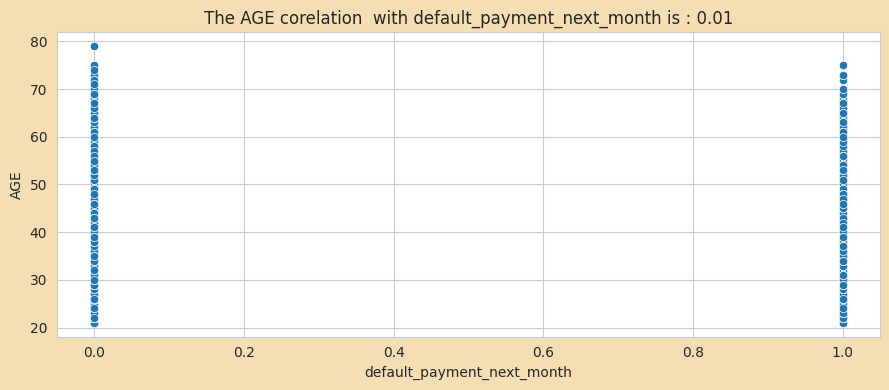

In [277]:
# ploting the scattere plot for below status list with targeted column.
status_list = ['pay_sept','pay_agu', 'pay_july', 'pay_jun', 'pay_may', 'pay_apr','LIMIT_BAL', 'SEX', 'default_payment_next_month', 'EDUCATION', 'MARRIAGE', 'AGE']

for status_ in status_list:
  corelation_ = round(np.corrcoef(df[status_], df['default_payment_next_month'])[0][1],2)
  plt.rcParams['figure.autolayout'] == True
  plt.figure(figsize = (9,4), facecolor = 'wheat')
  sns.scatterplot(x = df['default_payment_next_month'], y = df[status_])
  plt.title(f"The {status_} corelation  with default_payment_next_month is : {corelation_}")
  plt.plot()


##### 1. Why did you pick the specific chart?

I wanted to see the corelation of some selected columns with targeted variable that's why pick the above scatterplot.

##### 2. What is/are the insight(s) found from the chart?

From the above i get to know that the co-relation of some selected variable with targeted variable. and from the above scatterplot we can conclude that the non of the listed variable are co-related with targeted variable.

#### Chart - 14 - Correlation Heatmap

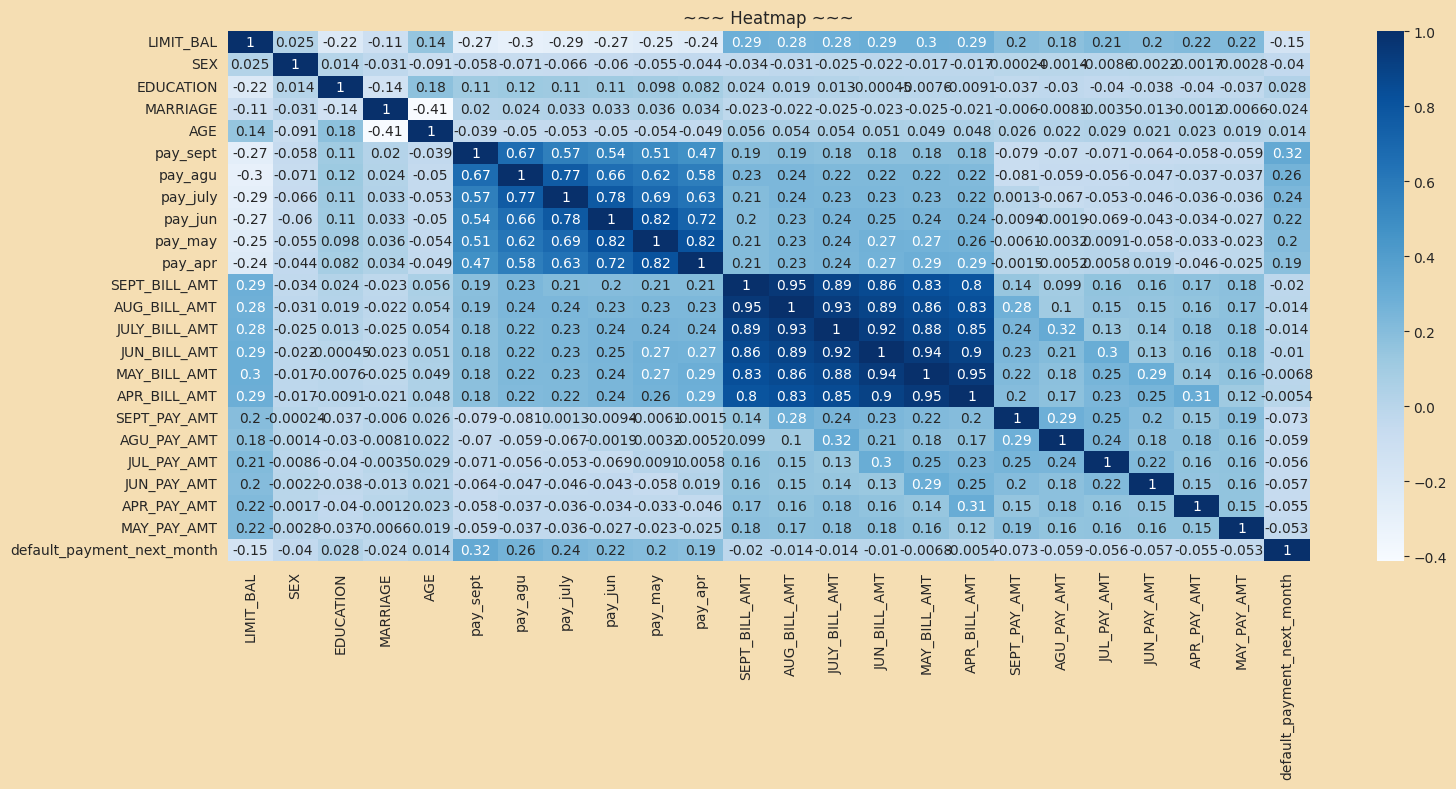

In [278]:
# Correlation Heatmap visualization code
# ploting the heatmap for getting to know the co-relation of each variable with each other.
corelation = df.corr()
plt.rcParams['figure.autolayout'] = True
plt.figure(figsize = (16,8), facecolor = 'wheat')
plt.title('~~~ Heatmap ~~~')
sns.heatmap(corelation, annot = True, cmap= 'Blues')
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to see the co-relation with co-relation percentage between each and every variable present in the dataset.and also wanted to know that what are the variables are highly co-related to our targeted or dependent variable. That's why i pick the heatmap for ploting the co-relations.

##### 2. What is/are the insight(s) found from the chart?

From the above heatmap i can conclude that none of the variable is highly co-related with dependent variable in the dataset. and we can also say that the payment status variables litle bit co-related with the dependent variable. and we can see in the above heatmap there is all the bill amount variables and payment status variable highly co-related with each othe. This kind of insights i got from the above heatmap.



#### Chart - 15 - Pair Plot

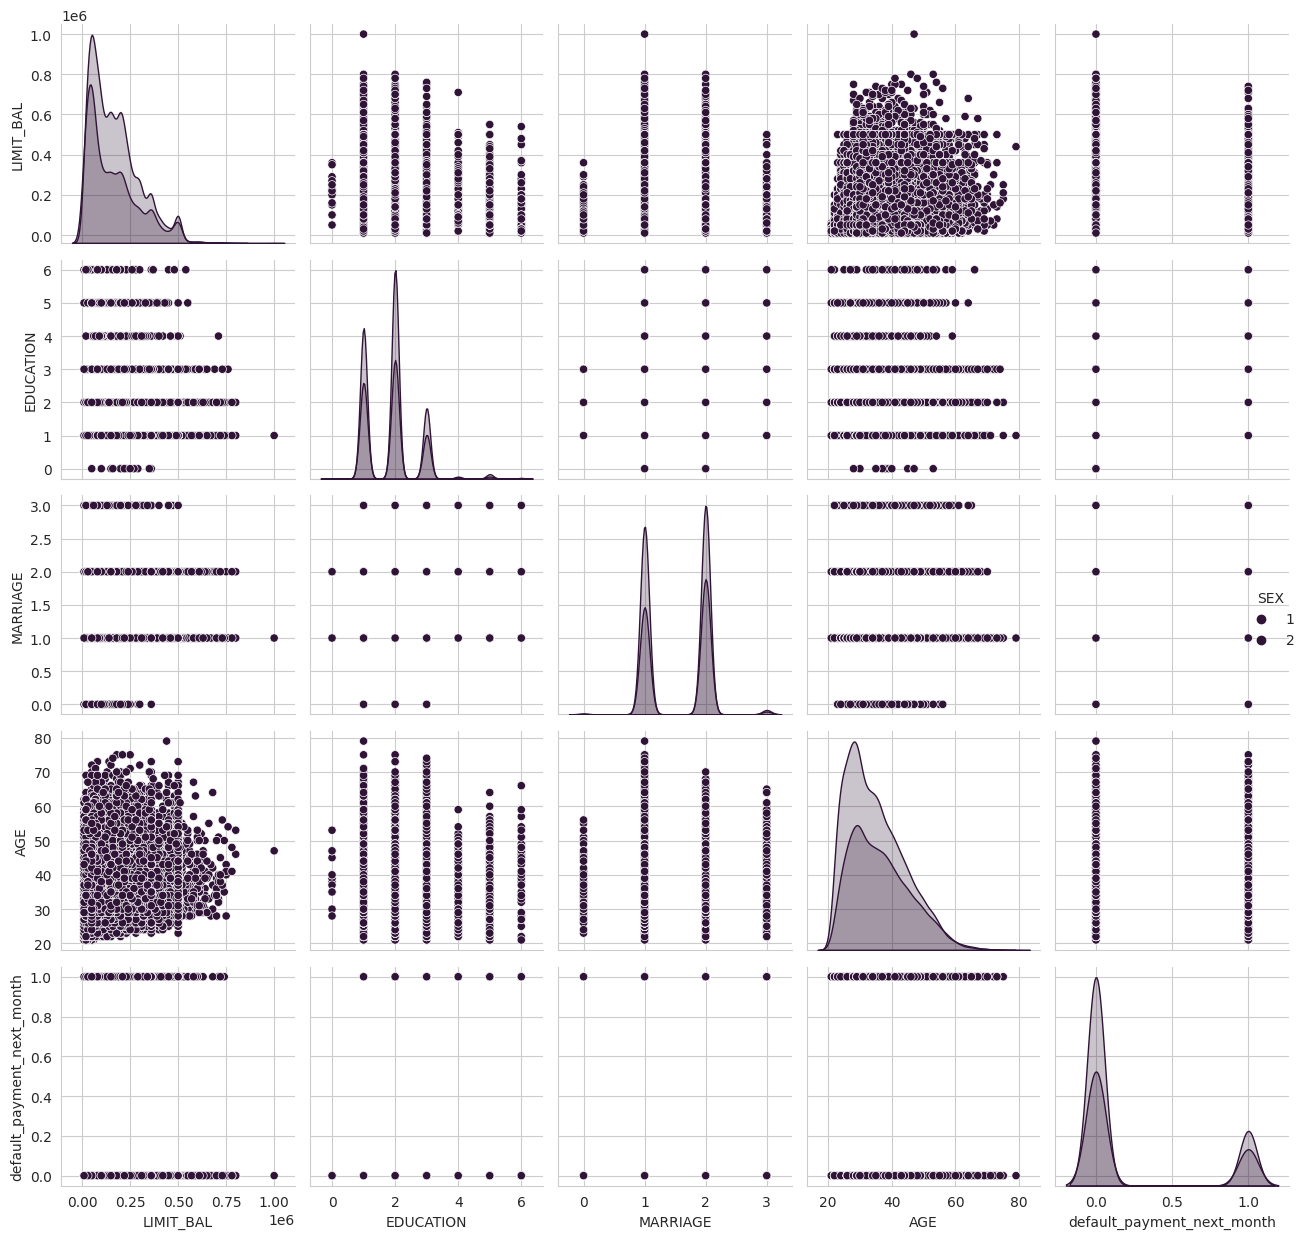

In [279]:
# Pair Plot visualization code for listed columns
m_df = df[['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE', 'default_payment_next_month']]

plt.rcParams['figure.autolayout'] == True
sns.pairplot(m_df, hue = 'SEX', palette= 'twilight_shifted')
plt.plot()
plt.show()

##### 1. Why did you pick the specific chart?

I wanted to plot pairwise relationships between variables within a dataset tht's why i pick the pairplot.

##### 2. What is/are the insight(s) found from the chart?

From the above i got the insight like whether the variable is cantinuos or categorical and what is the relationship between variables pairwise.  this kind of insights i got from the above pairplot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Performing the T-test one sampled on LIMIT_BAL column for getting to know whether the LIMIT_BAL average differs statistically from an actual or apposed LIMIT_BAL mean.A parametric testing technique is the One Sample t-test.



#### 2. Perform an appropriate statistical test.

In [280]:
# performing one sample ttest on LIMIT_Bal column to obtain the p-value.
Limit_bal = df['LIMIT_BAL']

# calulating the mean of limit_bal
mean_of_limit_bal = np.mean(Limit_bal)
print(f'Mean : {round(mean_of_limit_bal)}')


# Performing the one sample ttest

t_test, p_val = ttest_1samp(Limit_bal,166150)

# printing the P-value
print(f'p-value : {("%.2f"%p_val)}')
print(f't-test : {("%.2f"%t_test)}')

# defining the condition for acceptance or rejection of null hypothesis
if p_val > 0.05:
  print('we can accept the null hypothesis')
else:
  print('we can reject the null hypothesis')

Mean : 167484
p-value : 0.07
t-test : 1.78
we can accept the null hypothesis


##### Which statistical test have you done to obtain P-Value?

Above I have done the one Sample T-test statistical test to obtain the P-value. and i consider the mean as a 166150 but the actual mean is 167484. And that's why the p value is 0.07. and it's above 0.05 so we can accept this null Hypothesis.

##### Why did you choose the specific statistical test?

I wanted to know whether the LIMIT_BAL average differs statistically from an actual or apposed LIMIT_BAL mean. and there is only one variable which is LIMIT_BAL that's why i used the T-test one sample.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Performing the Independent T-Test on two indipendent varibles or samples to ascertain if there exists any statistical confirmation that the related LIMIT_BAL means are statistically substantially distinct.

#### 2. Perform an appropriate statistical test.

In [281]:
# Perform Statistical Test to obtain P-Value
Limit_bal = df['LIMIT_BAL']
jun_bill_amt_ =  df['JUN_BILL_AMT']


# calculating the below two data graphs
mean_of_limit_bal = np.mean(Limit_bal)
mean_of_jun_bill = np.mean(jun_bill_amt_)

# printing the above both mean
print(f'Mean of limit Bal : {mean_of_limit_bal}')
print(f'mean of jun bill : {mean_of_jun_bill}')

# implementing the t- test

t_test, p_val = ttest_ind(Limit_bal, jun_bill_amt_)
print(f'The t_test is : {"%.2f"%t_test}')
print(f'The p_val is : {"%.2f"%p_val}')


if p_val >0.05:
  print('we can accept the null hypothesis.')
else:
  print('we can reject the null hypothesis.')

Mean of limit Bal : 167484.32266666667
mean of jun bill : 43262.94896666666
The t_test is : 148.57
The p_val is : 0.00
we can reject the null hypothesis.


##### Which statistical test have you done to obtain P-Value?

I have done the Independent T-Test on the LIMIT_Bal and jum_bill_amt columns to obtain the P-value and i got the p-value as a 0.00 so we can reject this null hypothesis.

##### Why did you choose the specific statistical test?

Because i wanted to compare two sample means from unrelated groups that's why i used independent two sample t-test

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Performing the paired sample T-Test for getting to know about the substantial difference between two related variables is tested using a univariate test.

#### 2. Perform an appropriate statistical test.

In [282]:
# Perform Statistical Test to obtain P-Value
july_bill_amt_ = df['JULY_BILL_AMT']
july_pay_amt_ = df['JUL_PAY_AMT']

# implementing paired sample t- test to obtain the p- value.
t_test, p_val = ttest_rel(july_bill_amt_,july_pay_amt_)

print(f"The t-test is - {t_test}")
print(f"The p-val is - {p_val}")
if p_val > 0.05:
  print('we can accept this null hypothesis')
else:
  print("we can reject the null hypothesis")

The t-test is - 104.44858966099494
The p-val is - 0.0
we can reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

I have done the paired sampled test to obtained the P-Value.



##### Why did you choose the specific statistical test?

I wanted to know about the substantial difference between two related variables is tested using a univariate test. That's why i used this specific statistical test.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [283]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
pay_sept                      0
pay_agu                       0
pay_july                      0
pay_jun                       0
pay_may                       0
pay_apr                       0
SEPT_BILL_AMT                 0
AUG_BILL_AMT                  0
JULY_BILL_AMT                 0
JUN_BILL_AMT                  0
MAY_BILL_AMT                  0
APR_BILL_AMT                  0
SEPT_PAY_AMT                  0
AGU_PAY_AMT                   0
JUL_PAY_AMT                   0
JUN_PAY_AMT                   0
APR_PAY_AMT                   0
MAY_PAY_AMT                   0
default_payment_next_month    0
dtype: int64

From the above we can conclude that there is no null value present in this dataset. so we need to remove it.

### 2. Handling Outliers

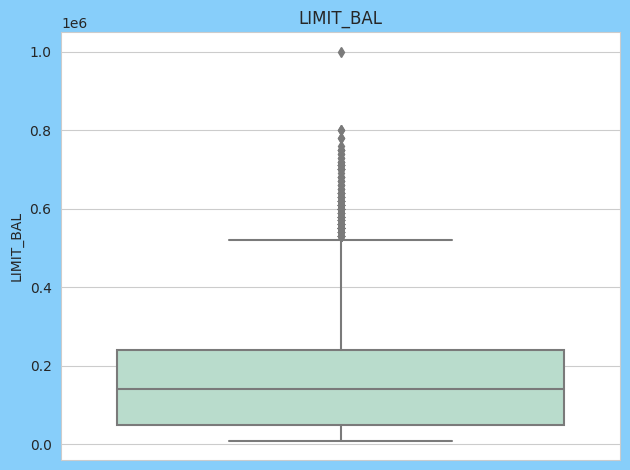

In [284]:
# Handling Outliers & Outlier treatments on the LIMIT BAL columnn.
sns.set_style('whitegrid')
plt.figure(facecolor = 'lightskyblue')
plt.rcParams['figure.autolayout'] = True
sns.boxplot(y=df['LIMIT_BAL'], palette='Pastel2')
plt.title('LIMIT_BAL')
plt.show()

In [285]:
# calculating the z_score for LIMIT_BAL
z_score = (df['LIMIT_BAL'] - df['LIMIT_BAL'].mean()) /df['LIMIT_BAL'].std()
threshold = 3

# droping the outliers from the LIMIT BAL column
df.drop(df[abs(z_score) > threshold].index, inplace = True)

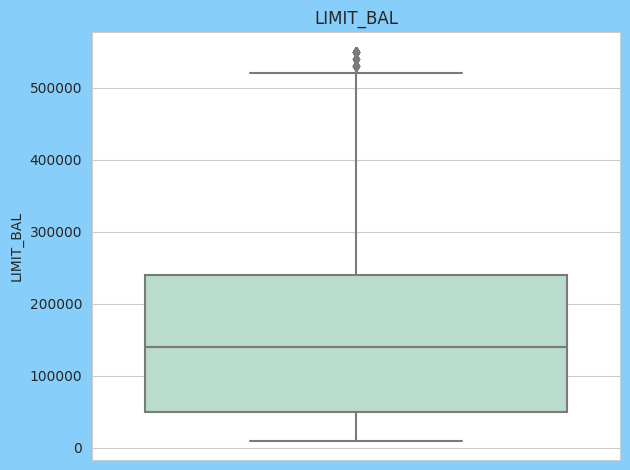

In [286]:
# ploting the boxplot for checking whether the outliers removed or not.
sns.set_style('whitegrid')
plt.figure(facecolor = 'lightskyblue')
plt.rcParams['figure.autolayout'] = True
sns.boxplot(y=df['LIMIT_BAL'], palette='Pastel2')
plt.title('LIMIT_BAL')
plt.show()

In [287]:
# Dataset shaper after removing outliers
df.shape

(29870, 24)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Above I have used the z-score outlier removing technique.

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [288]:
# Manipulate Features to minimize feature correlation and create new features
# Defining Function for calculating the VIF

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [289]:
# Calculating VIF for measuring the amount of multicolinearity.
calc_vif(df[[i for i in df.describe().columns]])


,variables,VIF
0,LIMIT_BAL,4.084438
1,SEX,9.116428
2,EDUCATION,6.739878
3,MARRIAGE,6.288129
4,AGE,11.064123
5,pay_sept,1.995795
6,pay_agu,3.211063
7,pay_july,3.722130
8,pay_jun,4.441187
9,pay_may,4.989206


#### 2. Feature Selection

In [290]:
# Select your features wisely to avoid overfitting
dep_var = 'default_payment_next_month'
indep_var = df.columns.drop(['default_payment_next_month','SEPT_BILL_AMT','AUG_BILL_AMT','JULY_BILL_AMT','JUN_BILL_AMT','MAY_BILL_AMT','APR_BILL_AMT'])

print(dep_var)
print(indep_var)

default_payment_next_month
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_sept',
       'pay_agu', 'pay_july', 'pay_jun', 'pay_may', 'pay_apr', 'SEPT_PAY_AMT',
       'AGU_PAY_AMT', 'JUL_PAY_AMT', 'JUN_PAY_AMT', 'APR_PAY_AMT',
       'MAY_PAY_AMT'],
      dtype='object')


In [291]:
# creating the data for independent variabel
x = df[indep_var].values
y = df[dep_var].values

##### What all feature selection methods have you used  and why?

I wanted to select the feature based on the VIF score that's why i used the VIF feature selection method for feature selection.

##### Which all features you found important and why?

I have found that all the below listed colums as a feature because they have VIF score less than 10.
'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'pay_sept',
'pay_agu', 'pay_july', 'pay_jun', 'pay_may', 'pay_apr', 'SEPT_PAY_AMT',
'AGU_PAY_AMT', 'JUL_PAY_AMT', 'JUN_PAY_AMT', 'APR_PAY_AMT',
'MAY_PAY_AMT'

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes I think data need to be trasformed because there are duplicate rows present in the dataset so we have to drop duplicate rows using drop_duplicates method.

In [292]:
# Checking the duplicates present in dataset or not.
df.duplicated().sum()

35

In [293]:
# Droping the duplicate rows from the dataset
df = df.drop_duplicates()

In [294]:
# checking whether the duplicate rows removed or not.
df.duplicated().sum()

0

### 5. Data Scaling

In [295]:
# Scaling your data
# Min-Max Scaling
min_max_scaler = MinMaxScaler()
scaled_data_min_max = min_max_scaler.fit_transform(df)
df_min_max = pd.DataFrame(scaled_data_min_max, columns=df.columns)

# printing the scaled data
df_min_max.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,pay_sept,pay_agu,pay_july,pay_jun,pay_may,...,JUN_BILL_AMT,MAY_BILL_AMT,APR_BILL_AMT,SEPT_PAY_AMT,AGU_PAY_AMT,JUL_PAY_AMT,JUN_PAY_AMT,APR_PAY_AMT,MAY_PAY_AMT,default_payment_next_month
0,0.018519,1.0,0.333333,0.333333,0.051724,0.4,0.4,0.1,0.1,0.0,...,0.193873,0.089884,0.326684,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000,1.0
1,0.203704,1.0,0.333333,0.666667,0.086207,0.1,0.4,0.2,0.2,0.2,...,0.197604,0.093703,0.329821,0.000000,0.000594,0.001125,0.001610,0.000000,0.003783,1.0
2,0.148148,1.0,0.333333,0.666667,0.224138,0.2,0.2,0.2,0.2,0.2,...,0.210216,0.106404,0.341641,0.001738,0.000891,0.001125,0.001610,0.002345,0.009458,0.0
3,0.074074,1.0,0.333333,0.333333,0.275862,0.2,0.2,0.2,0.2,0.2,...,0.226163,0.121888,0.355107,0.002290,0.001199,0.001350,0.001771,0.002506,0.001892,0.0
4,0.074074,0.0,0.333333,0.333333,0.620690,0.1,0.2,0.1,0.2,0.2,...,0.217753,0.111043,0.345087,0.002290,0.021779,0.011248,0.014493,0.001615,0.001284,0.0


##### Which method have you used to scale you data and why?

I wanted to scale the dataset that's why i used the min max scaler method to scale the data.

### 6. Data Splitting

In [296]:
# Splitting the dataset into the training and testing set.
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)
print(x_train.shape)
print(x_test.shape)

(23896, 17)
(5974, 17)


##### What data splitting ratio have you used and why?

For training i have taken the 80% of dataset and for testing i have taken the 20%. 80:20 ration i have used.

## ***7. ML Model Implementation***

In [297]:
def print_evaluate(true, predicted):
  Accuracy_score = accuracy_score(true,predicted)
  precision_score_ = precision_score(true,predicted)
  Recall_score_ = recall_score(true,predicted)
  F1_score_ = f1_score(true,predicted)

  print("___________________________________")
  print(f'Accuracy Score : {Accuracy_score}')
  print(f"Precision Score : {precision_score_}")
  print(f'Recall Score : {Recall_score_}')
  print(f'F1 Score : {F1_score_}')
  print('___________________________________')

### ML Model - 1 - Decision Tree Classifier

In [298]:
# ML Model - 1 Implementation of Decision Tree classifier
DTC_model = DecisionTreeClassifier()
# Fit the Algorithm
DTC_model.fit(x_train,y_train)
# Predict on the model
train_pred = DTC_model.predict(x_train)
test_pred = DTC_model.predict(x_test)

In [299]:
# printing the evaluation matrics on training dataset and testing dataset.
print("Train set Evaluation:")
print_evaluate(y_train,train_pred)

print("Test Set Evaluation:")
print_evaluate(y_test,test_pred)


Train set Evaluation:
___________________________________
Accuracy Score : 0.9992885838634081
Precision Score : 0.9998126288176878
Recall Score : 0.9970104633781763
F1 Score : 0.9984095799419964
___________________________________
Test Set Evaluation:
___________________________________
Accuracy Score : 0.7299966521593572
Precision Score : 0.376
Recall Score : 0.40644654088050314
F1 Score : 0.3906309029089535
___________________________________


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Above I have used the Decision Tree Classifier Model and I got the Precision and Recall as 0.99 on the training dataset but on the testing dataset this model is not performing well the precison score is 0.36 and the recall score is 0.40 and the f1 score is 0.38 we are getting on the testing dataset. so from the above evaluation chart we can conclude that this model is not performing well on this dataset.

### ML Model - 2 - Random Forest Classifier

In [323]:
# Random Forest Classifier model Implementation
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
random_forest.fit(x_train, y_train)

# predicting the values for testing dataset
test_pred = random_forest.predict(x_test)
train_pred = random_forest.predict(x_train)

In [324]:
# Primting evaluation chart and performance of the model on the training and testing dataset

# Performance on training dataset
print(" Performance on training dataset ")
print_evaluate(y_train, train_pred)

# performance on testing dataset
print(" Performance on testing dataset ")
print_evaluate(y_test,test_pred)

 Performance on training dataset 
___________________________________
Accuracy Score : 0.9992467358553733
Precision Score : 0.999064371257485
Recall Score : 0.9975710014947683
F1 Score : 0.9983171278982796
___________________________________
 Performance on testing dataset 
___________________________________
Accuracy Score : 0.9656846334114496
Precision Score : 0.8185538881309686
Recall Score : 0.8928571428571429
F1 Score : 0.8540925266903915
___________________________________


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Above I have used the Random Forest model and you can see that in the above evaluation metric that how the model is performing. on the training dataset the model performance is 0.99 and on testing dataset the model performance is 0.85. so from the above evaluation metrics or chart we can conclude that this module is performing average on this dataset. and need to optimize this model by cross- validation and hyperparameter tunning. Let's perform the cross-validation and hyperparameter tunning on this model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [308]:
# performing cross-validation on model with Fold = 5 and calculating the mean accuaracy of cross- validation
random_forest = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(random_forest, x, y, cv=5)
mean_cv_accuracy = np.mean(cv_scores)
print("Cross-Validation Mean Accuracy:", mean_cv_accuracy)

Cross-Validation Mean Accuracy: 0.8165718111817878


In [309]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(random_forest, param_grid, cv=5)

# Fit the GridSearchCV object to find the best hyperparameters
grid_search.fit(x_train, y_train)

# Get the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [327]:
# making prediction over the training and testing dataset with best model.
best_train_pred = best_model.predict(x_train)
best_test_pred = best_model.predict(x_test)

In [330]:
# printing evaluation chart of model for training and testing dataset.
print("Best Model perfromance on Training Dataset")
print_evaluate(y_train,best_train_pred)

print("Best Model perfromance on Testing Dataset")
print_evaluate(y_test, best_test_pred)

Best Model perfromance on Training Dataset
___________________________________
Accuracy Score : 0.844743890190827
Precision Score : 0.7819368131868132
Recall Score : 0.4254484304932735
F1 Score : 0.5510648596321395
___________________________________
Best Model perfromance on Testing Dataset
___________________________________
Accuracy Score : 1.0
Precision Score : 1.0
Recall Score : 1.0
F1 Score : 1.0
___________________________________


##### Which hyperparameter optimization technique have you used and why?

Above I have done the cross - validation and hyperparameter tunning. The GridSearchCV hyperparameter optimization technique has been used for hyperparameter tuning for finding the optimal parameter values from a given set of parameters in a grid.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes i have seen improvement on the model because before hyperparameter tunning the F1 score was 0.85 and now after hyper parameter tunning the F1 score is 1.0 it means model has predicted 100% accurate answer. but we can see that in the evaluation metrics that the model is performing well on the dataset before hyperparameter tunning but the model is not performing well on the training dataset after crosss- validation and hyperparameter tunning. before tunnig the F1 score and accuracy score was 0.99 for training dataset and after tunning the f1 score is 0.55 and the accuracy score is 0.84. so from the above evaluation chart we can conclude that the model is not performing weill on the trainig dataset after cross validation and hyperparameter tunning.

### ML Model - 3

In [303]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [304]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [305]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [306]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [307]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***